In [1]:
from ctapipe import utils
from matplotlib import pyplot as plt
import numpy as np
from pkg_resources import resource_filename
from ctapipe.visualization import CameraDisplay
import os
%matplotlib inline

<h3> Import reader module

In [2]:
from ctapipe.io.lsteventsource import LSTEventSource

<h3> loop and print one event

In [5]:
# you can use wildchards in the name (change the file name to test)
example_file_path = '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.000*.fits.fz'
inputfile_reader = LSTEventSource(
        input_url=example_file_path,
        max_events=10
    )

print("--> NUMBER OF FILES", inputfile_reader.multi_file.num_inputs())

--> NUMBER OF FILES 10


In [73]:
# check how many modules are on
for i, event in enumerate(inputfile_reader):
    all_modules_on=np.sum(event.lst.tel[0].evt.module_status)
    if(all_modules_on > 1): 
            print(f"Event {event.lst.tel[0].evt.event_id}, num modules on: {all_modules_on}")
   




Event 2, num modules on: 265
Event 3, num modules on: 265
Event 4, num modules on: 265
Event 5, num modules on: 265
Event 6, num modules on: 265
Event 7, num modules on: 265
Event 8, num modules on: 265
Event 10, num modules on: 265
Event 11, num modules on: 265
Event 12, num modules on: 265


<h3> Event containers

In [5]:
event

ctapipe.io.containers.LSTDataContainer:
                          r0.*: Raw Data
                          r1.*: R1 Calibrated Data
                         dl0.*: DL0 Data Volume Reduced Data
                         dl1.*: DL1 Calibrated image
                         dl2.*: Reconstructed Shower Information
                          mc.*: Monte-Carlo data
                    mcheader.*: Monte-Carlo run header data
                        trig.*: central trigger information
                         count: number of events processed
                        inst.*: instrumental information (deprecated
                   pointing[*]: Telescope pointing positions
                         lst.*: LST specific Information

<h3> Instrument container

In [6]:
subarray=event.inst.subarray
event.inst.subarray.info()


Subarray : LST1 subarray
Num Tels : 1
Footprint: 0.02 km2

                TYPE  Num IDmin  IDmax
      LST:LSTCam-002    1    0 ..   0


In [7]:
event.inst.subarray

SubarrayDescription(name='LST1 subarray', num_tels=1)

/scratch4/franca/soft/ctapipe/ctapipe/instrument/subarray.py:118: UserWarning: SubarrayDescription.pos_x is deprecated. Use tel_coords.x
  warnings.warn("SubarrayDescription.pos_x is deprecated. Use "
/scratch4/franca/soft/ctapipe/ctapipe/instrument/subarray.py:125: UserWarning: SubarrayDescription.pos_y is deprecated. Use tel_coords.y
  warnings.warn("SubarrayDescription.pos_y is deprecated. Use "


(-100, 100)

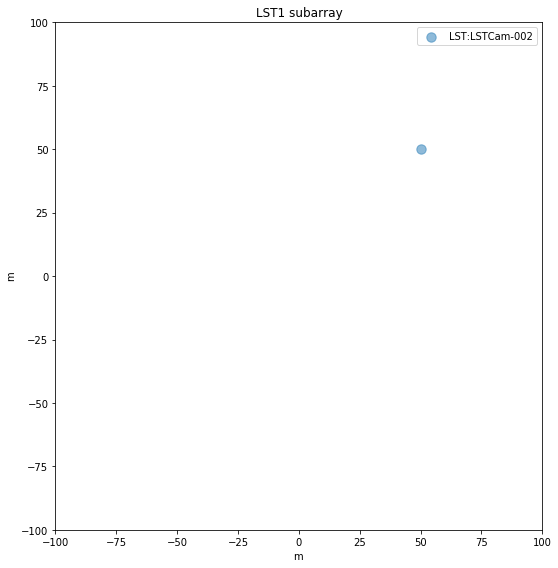

In [8]:
subarray.peek()
plt.xlim(-100,100)
plt.ylim(-100,100)

In [9]:
subarray.to_table()

tel_id,tel_pos_x,tel_pos_y,tel_pos_z,tel_type,tel_subtype,mirror_type,camera_type,tel_description
,m,m,m,,,,,
int16,float64,float64,float64,str3,str1,str2,str10,str14
0,50.0,50.0,16.0,LST,,DC,LSTCam-002,LST:LSTCam-002


In [10]:
tel=event.inst.subarray.tels[0] # contains camera and optics
print(tel.camera)
print(tel.optics)

LSTCam-002
LST


In [11]:
tel.camera

CameraGeometry(cam_id='LSTCam-002', pix_type='hexagonal', npix=1855, cam_rot=0.0 deg, pix_rot=-10.893 deg)

In [12]:
tel.camera.pix_y

<Quantity [ 0.       ,  0.0377964,  0.0472456, ..., -0.6708869,  0.4535574,
            0.5008029] m>

In [13]:
tel.camera.to_table()

pix_id,pix_x,pix_y,pix_area
,m,m,m2
int64,float64,float64,float64
0,0.0,0.0,0.0021649681944033382
1,0.0327327,0.0377964,0.0021649681944033382
2,-0.0163663,0.047245600000000006,0.0021649681944033382
3,-0.049099,0.0094491,0.0021649681944033382
4,-0.0327327,-0.0377964,0.0021649681944033382
5,0.0163663,-0.047245600000000006,0.0021649681944033382
6,0.049099,-0.0094491,0.0021649681944033382
7,0.0654654,0.0755929,0.0021649681944033382


In [14]:
tel.optics

OpticsDescription(tel_type='LST', tel_subtype='')

In [15]:
tel.optics.mirror_type

'DC'

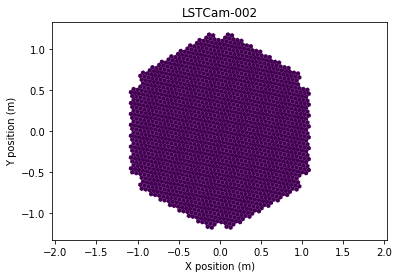

In [16]:
disp = CameraDisplay(tel.camera)

<h3>LST container


In [17]:
event.lst

ctapipe.io.containers.LSTContainer:
                tels_with_data: list of telescopes with data
                        tel[*]: map of tel_id to LSTTelContainer

In [18]:
event.lst.tel[0]

ctapipe.io.containers.LSTCameraContainer:
                         evt.*: LST specific event Information
                         svc.*: LST specific camera_config Information

In [19]:
event.lst.tel[0].svc

ctapipe.io.containers.LSTServiceContainer:
                  telescope_id: telescope id
                     cs_serial: serial number of the camera server
              configuration_id: id of the CameraConfiguration
                          date: NTP start of run date
                    num_pixels: number of pixels
                   num_samples: num samples
                     pixel_ids: id of the pixels in the waveform array
            data_model_version: data model version
                  idaq_version: idaq version
                  cdhs_version: cdhs version
                    algorithms: algorithms
           pre_proc_algorithms: pre processing algorithms
                    module_ids: module ids
                   num_modules: number of modules

In [20]:
event.lst.tel[0].evt

ctapipe.io.containers.LSTEventContainer:
              configuration_id: id of the CameraConfiguration
                      event_id: local id of the event
                  tel_event_id: global id of the event
                  pixel_status: status of the pixels
                        ped_id: tel_event_id of the event used for pedestal
                                substraction
                 module_status: status of the modules
           extdevices_presence: presence of data for external devices
                      tib_data: TIB data array
                     cdts_data: CDTS data array
                     swat_data: SWAT data array
                      counters: counters
                   chips_flags: chips flags
            first_capacitor_id: first capacitor id
                drs_tag_status: DRS tag status
                       drs_tag: DRS tag

<h3> Module status

In [21]:
event.lst.tel[0].svc.module_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

(265,)
12
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


265

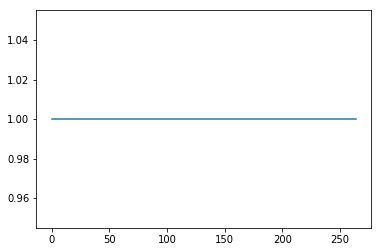

In [22]:
print(event.lst.tel[0].evt.module_status.shape)
print(event.lst.tel[0].evt.event_id)
print(event.lst.tel[0].evt.module_status)
plt.plot(event.lst.tel[0].evt.module_status)
np.sum(event.lst.tel[0].evt.module_status)


In [23]:
mod=event.lst.tel[0].evt.module_status
no_working_mod_rank=np.where(mod == 0)[0]
print(f"No working module ranks: \n {no_working_mod_rank}")
module_ids=event.lst.tel[0].svc.module_ids
no_working_mod=module_ids[no_working_mod_rank]
print(f"No working modules \n {no_working_mod}")

No working module ranks: 
 []
No working modules 
 []


<h3> Event status

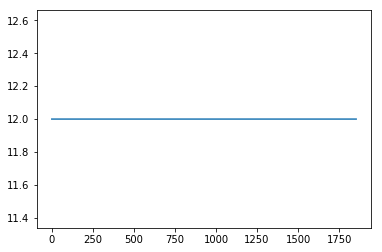

In [24]:
plt.plot(event.lst.tel[0].evt.pixel_status)

In [26]:
no_working_pixel_rank=np.where(event.lst.tel[0].evt.pixel_status==0)[0]
print(f"No working pixel ranks: \n {no_working_pixel_rank}")
pixel_ids=event.lst.tel[0].svc.pixel_ids
no_working_pixels=pixel_ids[no_working_pixel_rank]
print(f"No working pixels: \n {no_working_pixels}")

No working pixel ranks: 
 []
No working pixels: 
 []


<H3> R0 event container

In [27]:
event.r0

ctapipe.io.containers.R0Container:
                        obs_id: observation ID
                      event_id: event id number
                tels_with_data: list of telescopes with data
                        tel[*]: map of tel_id to R0CameraContainer

In [28]:
event.r0.tel[0]

ctapipe.io.containers.R0CameraContainer:
                  trigger_time: Telescope trigger time, start of waveform
                                readout, None for MCs
                  trigger_type: camera's event trigger type if applicable
                  num_trig_pix: Number of trigger groups (sectors) listed
                   trig_pix_id: pixels involved in the camera trigger
                         image: numpy array containing integrated ADC data
                                (n_channels x n_pixels) DEPRECATED
                      waveform: numpy array containing ADC samples(n_channels x
                                n_pixels, n_samples)
                   num_samples: number of time samples for telescope

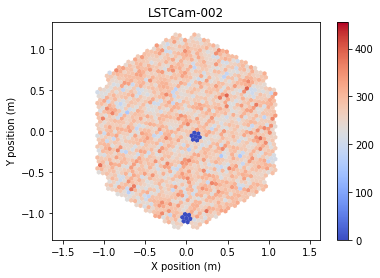

In [68]:

disp = CameraDisplay(tel.camera)
disp.image = event.r0.tel[0].waveform[0,:,20]  # display channel 0, sample 10

disp.cmap = plt.cm.coolwarm
disp.add_colorbar()
disp.set_limits_minmax(0, 455)
#plt.xlim(-0.1,0.1)
#plt.ylim(-0.1,0.1)


In [76]:
event.r0.event_id

12

<H3> Select the high gain waveform of the pixel at the place 12 in the array and plot it

In [32]:
event.r0.tel[0].waveform.shape
HG=0
LG=1

In [33]:
waveform_HG=event.r0.tel[0].waveform[HG,] # all HG waveforms
waveform_HG.shape

(1855, 40)

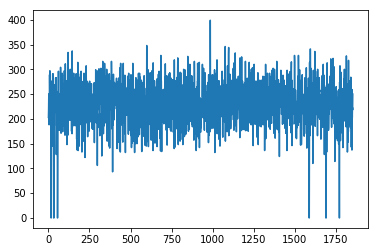

In [63]:

plt.plot(event.r0.tel[0].waveform[HG,:,20]) #plot sample 20 of HG waveforms

In [35]:
from ipywidgets import interact

@interact
def view_waveform(chan=0, pix_rank=200):
    plt.plot(event.r0.tel[0].waveform[chan,pix_rank])

interactive(children=(IntSlider(value=0, description='chan', max=1), IntSlider(value=200, description='pix_rank', max=600, min=-200), Output()), _dom_classes=('widget-interact',))

16 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--> module  2 , pixel id  1619   12  

17 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--> module  2 , pixel id  1716   12  

32 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--> module  4 , pixel id  1615   12  

33 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--> module  4 , pixel id  1369   12  

34 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--> module  5 , pixel id  1501   12  

55 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
--> module  8 , pixel id  1710   12  

56 [0. 0. 

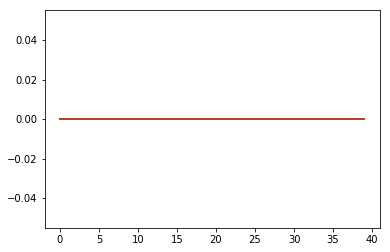

In [69]:
for i, mywave in enumerate(waveform_HG) :
    if mywave.sum() == 0 :
        print(i, mywave)
        #print("--> module, pixel ", event.lst.tel[0].svc.module_ids[int(i/7)], ", ", i, "\n    waveform ", mywave, " \n" )
        print("--> module ", event.lst.tel[0].svc.module_ids[int((i+1)/7)],", pixel id ", event.lst.tel[0].svc.pixel_ids[i]," ",event.lst.tel[0].evt.pixel_status[i],  " \n" )
        plt.plot(mywave)       

In [37]:
waveform_LG=event.r0.tel[0].waveform[LG,]
waveform_LG.shape

(1855, 40)

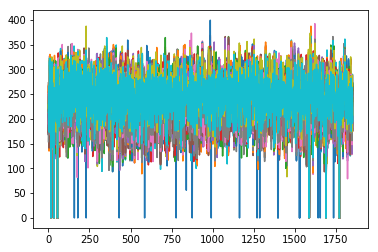

In [38]:
plt.plot(event.r0.tel[0].waveform[LG,:])

In [7]:
import glob
    
ls = glob.glob("/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.*.fits.fz")

In [9]:
ls

['/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0000.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0001.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0002.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0003.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0004.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0005.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0006.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0007.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0008.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0009.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0010.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0011.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0012.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0013.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0014.fits.fz',
 '/ctadata/LSTCAM/ZFITS/20181030/LST-1.Run0030.0015.fits.fz',
 '/ctada